In [34]:
#inport statments
import pandas as pd
%pylab inline
#import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib
matplotlib.style.use('ggplot')

#import data in to DF
titanic_data_df = pd.read_csv('titanic_data.csv')

titanic_data_df.head() #get a feel

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [35]:
# method used for analysis below
def extract_survival_and_non_counts(df_gb):
    #this is a somewhat specialized method that would only really work on data with survior data coded this way
    #takes in a group by object and returns a DF with 2 coloums that contain the count of survived and the count of non survived
    output = pd.DataFrame({})
    output['not_survived'] = df_gb.count()['Survived'] - df_gb.sum()['Survived']
    output = output.join(df_gb.sum()['Survived'])
    return output

def calc_ratio(df):
    df['total'] = df['Survived'] + df['not_survived']
    df['survival_ratio'] = df['Survived'] / df['total']
    return df
    

#  Gender Survival Analysis
My intentions here are to investigate what role if any gender played in survival.

        not_survived  Survived
Sex                           
female            81       233
male             468       109

        not_survived  Survived  total  survival_ratio
Sex                                                  
female            81       233    314        0.742038
male             468       109    577        0.188908


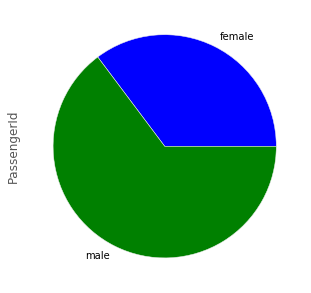

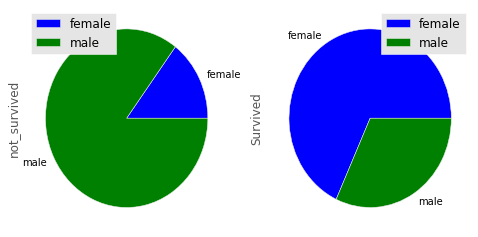

In [36]:
#plot some stats
#i am choosing Pie graphs because i feel like they convey a classifiable metric breakdown within a sample population best

#first group data by feild of intrest
titanic_data_grouped_by_sex = titanic_data_df.groupby('Sex')

#get initial sample breakdown visualization
titanic_data_grouped_by_sex.count()['PassengerId'].plot.pie(figsize=(5, 5))

#then extract survior data and include this in a visualization
survivor_data_by_sex = extract_survival_and_non_counts(titanic_data_grouped_by_sex)
print survivor_data_by_sex 
print

#plot the ratios of suvived vs not survived for each gender
survivor_data_by_sex.plot.pie(subplots=True, figsize=(8, 4))

#calc and print survival ratios
print calc_ratio(survivor_data_by_sex)

## Class Survival Analysis

        not_survived  Survived
Pclass                        
1                 80       136
2                 97        87
3                372       119


array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c10ec10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10c162a10>], dtype=object)

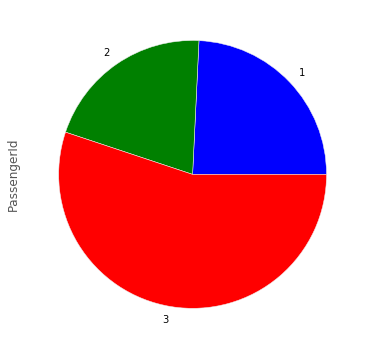

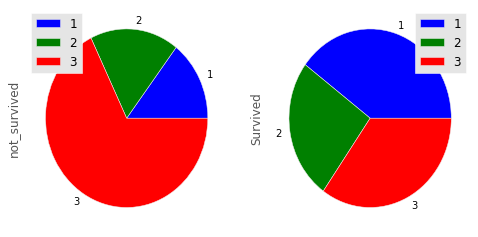

In [37]:
#plot some stats
#i am choosing Pie graphs because i feel like they convey a classifiable metric breakdown within a sample population best

#first group data by feild of intrest
titanic_data_grouped_by_class = titanic_data_df.groupby('Pclass')

#get initial sample breakdown visualization
titanic_data_grouped_by_class.count()['PassengerId'].plot.pie(figsize=(6, 6))

#then extract survior data and include this in a visualization
survivor_data_by_class = extract_survival_and_non_counts(titanic_data_grouped_by_class)
print survivor_data_by_class

#plot the ratios of suvived vs not survived
survivor_data_by_class.plot.pie(subplots=True, figsize=(8, 4))


        not_survived  Survived  total  survival_ratio
Pclass                                               
1                 80       136    216        0.629630
2                 97        87    184        0.472826
3                372       119    491        0.242363


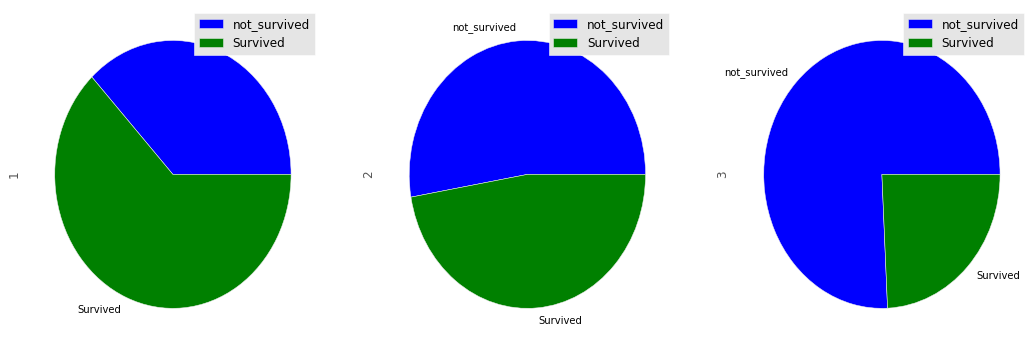

In [38]:
survivor_data_by_class.transpose().plot.pie(subplots=True, figsize=(18, 6))

#calc and print survival ratios
print calc_ratio(survivor_data_by_class)

## Age Survival Analysis

Total records in data set 891
Number of records missing age data 177
      not_survived  Survived
Age                         
0.42             0         1
0.67             0         1
0.75             0         2
0.83             0         2
0.92             0         1


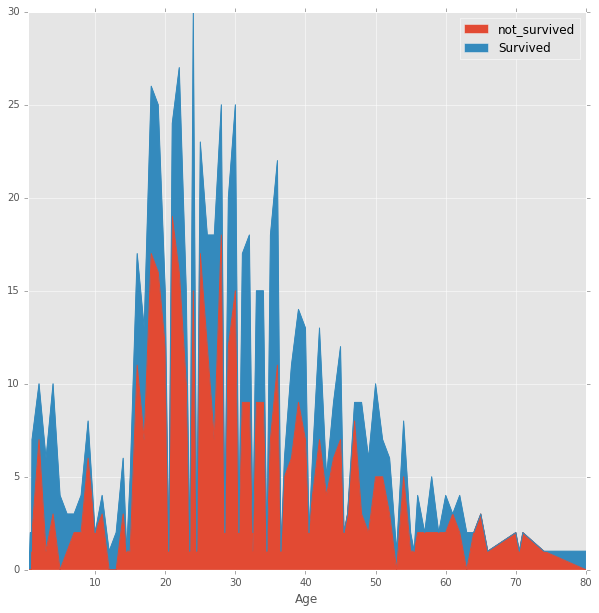

In [39]:
#plot some stats

#quantifying limitations in the Age data
print "Total records in data set " + str(len(titanic_data_df['Age']))
print "Number of records missing age data " + str(isnan(titanic_data_df['Age']).sum())


#first group data by feild of intrest
titanic_data_grouped_by_age = titanic_data_df.groupby('Age') #group by excludes NaNs so no cleansing needed

#then extract survior data and include this in a visualization
survivor_data_by_age = extract_survival_and_non_counts(titanic_data_grouped_by_age)
print survivor_data_by_age.head()

#i choose an area line graph with stacking to show the break down of the count of each age, into survived and not survived
survivor_data_by_age.plot(kind='area', stacked=True, figsize=(10,10))

In [40]:
#this may be a little redundant but it may be a fun use of vecorized operations
#compute the survival ratios for each data point
survivor_data_by_age['total'] = survivor_data_by_age['Survived'] + survivor_data_by_age['not_survived']
survivor_data_by_age['survival_ratio'] = survivor_data_by_age['Survived'] / survivor_data_by_age['total']

print survivor_data_by_age.head()

#survivor_data_by_age['survival_ratio'].plot() #supressed this plot as per reviewer
survivor_data_by_age['survival_ratio'].describe()


      not_survived  Survived  total  survival_ratio
Age                                                
0.42             0         1      1               1
0.67             0         1      1               1
0.75             0         2      2               1
0.83             0         2      2               1
0.92             0         1      1               1


count    88.000000
mean      0.392889
std       0.322385
min       0.000000
25%       0.000000
50%       0.387500
75%       0.500000
max       1.000000
Name: survival_ratio, dtype: float64

[  0.42   0.67   0.75   0.83   0.92   1.     2.     3.     4.     5.     6.
   7.     8.     9.    10.    11.    12.    13.    14.    14.5   15.    16.
  17.    18.    19.    20.    20.5   21.    22.    23.    23.5   24.    24.5
  25.    26.    27.    28.    28.5   29.    30.    30.5   31.    32.    32.5
  33.    34.    34.5   35.    36.    36.5   37.    38.    39.    40.    40.5
  41.    42.    43.    44.    45.    45.5   46.    47.    48.    49.    50.
  51.    52.    53.    54.    55.    55.5   56.    57.    58.    59.    60.
  61.    62.    63.    64.    65.    66.    70.    70.5   71.    74.    80.  ]
[ 1.          1.          1.          1.          1.          0.71428571
  0.3         0.83333333  0.7         1.          0.66666667  0.33333333
  0.5         0.25        0.          0.25        1.          1.          0.5
  0.          0.8         0.35294118  0.46153846  0.34615385  0.36        0.2
  0.          0.20833333  0.40740741  0.33333333  0.          0.5         0.
  0.260

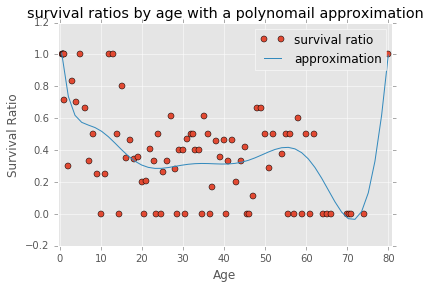

In [41]:
#i wanted to visualize a polynomial approximation curved so the following code was taken and adapted from stack overflow
#http://stackoverflow.com/questions/19165259/python-numpy-scipy-curve-fitting

# get x and y vectors
x = survivor_data_by_age.index.values
print x
y = survivor_data_by_age['survival_ratio'].values
print y

# calculate polynomial
z = np.polyfit(x, y, 10) #i experimented with the order of the polynomial to achive more detail, without being unessisary
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.xlabel('Age')
plt.ylabel('Survival Ratio')
plt.title('survival ratios by age with a polynomail approximation')
plt.legend(['survival ratio', 'approximation'])
plt.show()

##Conclusion